In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
import seaborn as sns
from scapy.all import rdpcap
from features.utils import write_to_csv, traffic_stats_summary

%matplotlib inline

### Load and Read Dataset

In [5]:
normal = "./data/dataset/normal.pcap"
ddos = "./data/dataset/ddos.pcap"

csv_normal = "./data/csv/normal.csv"
csv_ddos = "./data/csv/ddos.csv"

# Create the output directory if it doesn't exist
os.makedirs("./data/csv", exist_ok=True)

# Read normal traffic pcap file
packets_normal = rdpcap(normal)
df_ddos = write_to_csv(packets_normal, csv_normal)

# Read DDoS traffic pcap file
packets_ddos = rdpcap(ddos)
df_normal = write_to_csv(packets_ddos, csv_ddos)

In [6]:
df_ddos.head()

frame_number      src_addr       dst_addr  src_port  dst_port tcp_flags  \
0             0  192.168.50.6  172.217.10.98     54799       443        PA   
1             1  192.168.50.6  172.217.10.98     54799       443        PA   
2             2  192.168.50.6    172.217.7.2     54800       443        PA   
3             3  192.168.50.6    172.217.7.2     54800       443        PA   
4             4  192.168.50.6  172.217.10.98     54801       443        PA   

   protocol  
0         6  
1         6  
2         6  
3         6  
4         6

In [7]:
df_normal.head()

frame_number      src_addr      dst_addr  src_port  dst_port tcp_flags  \
0             0    172.16.0.5  192.168.50.1     52003        80         S   
1             1    172.16.0.5  192.168.50.1     52003        80         S   
2             2  192.168.50.1    172.16.0.5        80     52003        SA   
3             3  192.168.50.1    172.16.0.5        80     52003        SA   
4             4    172.16.0.5  192.168.50.1     52003        80         A   

   protocol  
0         6  
1         6  
2         6  
3         6  
4         6

In [8]:
df_normal.shape

(3104, 7)

In [9]:
df_ddos.shape

(27725, 7)

## Data Pre-processing

In [10]:
# Create the output directory if they don't exist
os.makedirs("./data/batches", exist_ok=True)

# Process normal .csv files
df_normal = traffic_stats_summary('./data/csv/normal.csv', 'normal')
df_normal.to_csv('./data/batches/normal.csv', index = False)

# Process ddos .csv files
df_ddos = traffic_stats_summary('./data/csv/ddos.csv', 'ddos')
df_ddos.to_csv('./data/batches/ddos.csv', index = False)

In [11]:
df_ddos.head()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
1       6.0             7.96                7.0        1.018776   
2       6.0             7.84                7.0        0.994286   
3       6.0             7.84                7.0        0.994286   
4       6.0             7.92                7.0        1.013878   
5       6.0             7.72                7.0        0.940408   

   ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
1        1.009344                   0       0.126802               0   
2        0.997139                   0       0.127186               0   
3        0.997139                   0       0.127186               0   
4        1.006915                   0       0.127136               0   
5        0.969746                   0       0.125615               0   

   ip.src.len.rte  ip.dst.len.mean  ...  dport.rte  tcp.flags.mean  \
1            0.04             8.04  ...       0.12          109.94   
2            0.04             8.16  ...       0.14          104.70   
3            0.04             8.16  ...       0.14          113.90   
4            0.04             8.08  ...       0.12          106.34   
5            0.04             8.28  ...       0.12          102.54   

   tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
1             135.0    1427.771837      37.785868                  0   
2              83.0    1486.948980      38.560977                  0   
3             135.0    1407.234694      37.513127                  0   
4             135.0    1422.269796      37.712992                  0   
5              83.0    1459.763673      38.206854                  0   

   tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte  status  
1      0.343695              0            0.1    ddos  
2      0.368300              0            0.1    ddos  
3      0.329351              0            0.1    ddos  
4      0.354645              0            0.1    ddos  
5      0.372604              0            0.1    ddos  

[5 rows x 42 columns]

In [12]:
df_normal.head()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
1      7.32             8.82                9.0        3.089388   
2      7.98            10.16               12.0        5.443265   
3      7.10             9.26                9.0        2.196327   
4      7.32             9.34                9.0        0.841224   
5     11.72             7.70                9.0        4.908163   

   ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
1        1.757665                   0       0.199282               0   
2        2.333081                   0       0.229634               0   
3        1.482001                   0       0.160043               0   
4        0.917183                   0       0.098199               0   
5        2.215437                   0       0.287719               0   

   ip.src.len.rte  ip.dst.len.mean  ...  dport.rte  tcp.flags.mean  \
1            0.08             9.70  ...       0.26          103.04   
2            0.06             9.30  ...       0.16           97.18   
3            0.08             9.32  ...       0.22           87.50   
4            0.06             8.86  ...       0.14          101.12   
5            0.04             7.72  ...       0.26           56.68   

   tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
1             135.0    2446.733061      49.464463                  0   
2             140.0    3204.477143      56.608101                  0   
3              65.0    2221.275510      47.130410                  0   
4             145.0    2725.822041      52.209406                  0   
5               0.0    4243.609796      65.142995                  0   

   tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte  status  
1      0.480051              0           0.16  normal  
2      0.582508              0           0.10  normal  
3      0.538633              0           0.10  normal  
4      0.516311              0           0.08  normal  
5      1.149312              0           0.10  normal  

[5 rows x 42 columns]

## Exploratory Data Analysis

In [15]:
df = pd.concat([df_normal, df_ddos], ignore_index=True)
df = df.fillna(0)
df['status'] = df['status'].map({'normal': 0, 'ddos': 1})
df.head()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
0      7.32             8.82                9.0        3.089388   
1      7.98            10.16               12.0        5.443265   
2      7.10             9.26                9.0        2.196327   
3      7.32             9.34                9.0        0.841224   
4     11.72             7.70                9.0        4.908163   

   ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
0        1.757665                   0       0.199282               0   
1        2.333081                   0       0.229634               0   
2        1.482001                   0       0.160043               0   
3        0.917183                   0       0.098199               0   
4        2.215437                   0       0.287719               0   

   ip.src.len.rte  ip.dst.len.mean  ...  dport.rte  tcp.flags.mean  \
0            0.08             9.70  ...       0.26          103.04   
1            0.06             9.30  ...       0.16           97.18   
2            0.08             9.32  ...       0.22           87.50   
3            0.06             8.86  ...       0.14          101.12   
4            0.04             7.72  ...       0.26           56.68   

   tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
0             135.0    2446.733061      49.464463                  0   
1             140.0    3204.477143      56.608101                  0   
2              65.0    2221.275510      47.130410                  0   
3             145.0    2725.822041      52.209406                  0   
4               0.0    4243.609796      65.142995                  0   

   tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte  status  
0      0.480051              0           0.16       0  
1      0.582508              0           0.10       0  
2      0.538633              0           0.10       0  
3      0.516311              0           0.08       0  
4      1.149312              0           0.10       0  

[5 rows x 42 columns]

In [16]:
df.describe()

ip.proto  ip.src.len.mean  ip.src.len.median  ip.src.len.var  \
count  308.000000       308.000000         308.000000      308.000000   
mean     7.351429         9.050195           9.063312        2.230097   
std      1.675739         0.640622           0.792915        1.755569   
min      6.000000         6.800000           7.000000        0.000000   
25%      6.000000         8.780000           9.000000        0.961633   
50%      6.880000         9.180000           9.000000        1.689796   
75%      7.980000         9.480000           9.000000        3.031939   
max     16.340000        10.380000          12.000000        7.864898   

       ip.src.len.std  ip.src.len.entropy  ip.src.len.cv  ip.src.len.cvq  \
count      308.000000               308.0     308.000000           308.0   
mean         1.375881                 0.0       0.154343             0.0   
std          0.581503                 0.0       0.070993             0.0   
min          0.000000                 0.0       0.000000             0.0   
25%          0.980629                 0.0       0.104818             0.0   
50%          1.299916                 0.0       0.138599             0.0   
75%          1.741234                 0.0       0.191723             0.0   
max          2.804443                 0.0       0.368696             0.0   

       ip.src.len.rte  ip.dst.len.mean  ...   dport.rte  tcp.flags.mean  \
count      308.000000       308.000000  ...  308.000000      308.000000   
mean         0.070000         9.042143  ...    0.211494       89.715325   
std          0.019539         0.597357  ...    0.081734       19.676815   
min          0.020000         6.500000  ...    0.040000        5.300000   
25%          0.060000         8.735000  ...    0.140000       77.355000   
50%          0.080000         9.200000  ...    0.200000       92.560000   
75%          0.080000         9.460000  ...    0.260000      104.750000   
max          0.120000        10.200000  ...    0.440000      126.600000   

       tcp.flags.median  tcp.flags.var  tcp.flags.std  tcp.flags.entropy  \
count        308.000000     308.000000     308.000000              308.0   
mean          88.878247    2119.832518      44.554149                0.0   
std           37.335816     932.882261      11.627521                0.0   
min            0.000000       0.000000       0.000000                0.0   
25%           65.000000    1476.109796      38.420173                0.0   
50%           65.000000    1960.280204      44.275028                0.0   
75%          135.000000    2790.521224      52.825384                0.0   
max          145.000000    4992.773878      70.659563                0.0   

       tcp.flags.cv  tcp.flags.cvq  tcp.flags.rte      status  
count    308.000000          308.0     308.000000  308.000000  
mean       0.543221            0.0       0.086169    0.100649  
std        0.327482            0.0       0.025972    0.301353  
min        0.000000            0.0       0.020000    0.000000  
25%        0.370014            0.0       0.060000    0.000000  
50%        0.479466            0.0       0.100000    0.000000  
75%        0.622311            0.0       0.100000    0.000000  
max        4.284824            0.0       0.160000    1.000000  

[8 rows x 42 columns]

## Bivariate Data Analysis

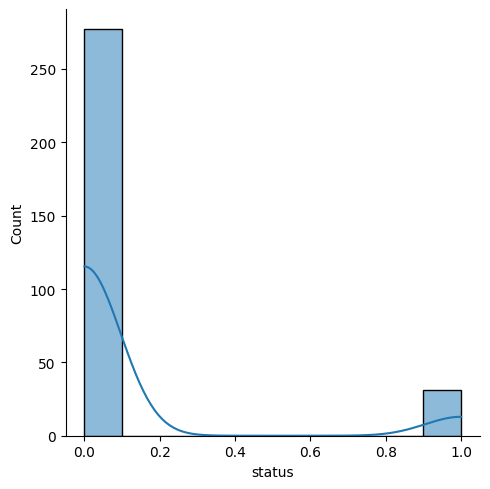

In [17]:
sns.displot(df['status'],kde=True)

## Multivariate Data Analysis

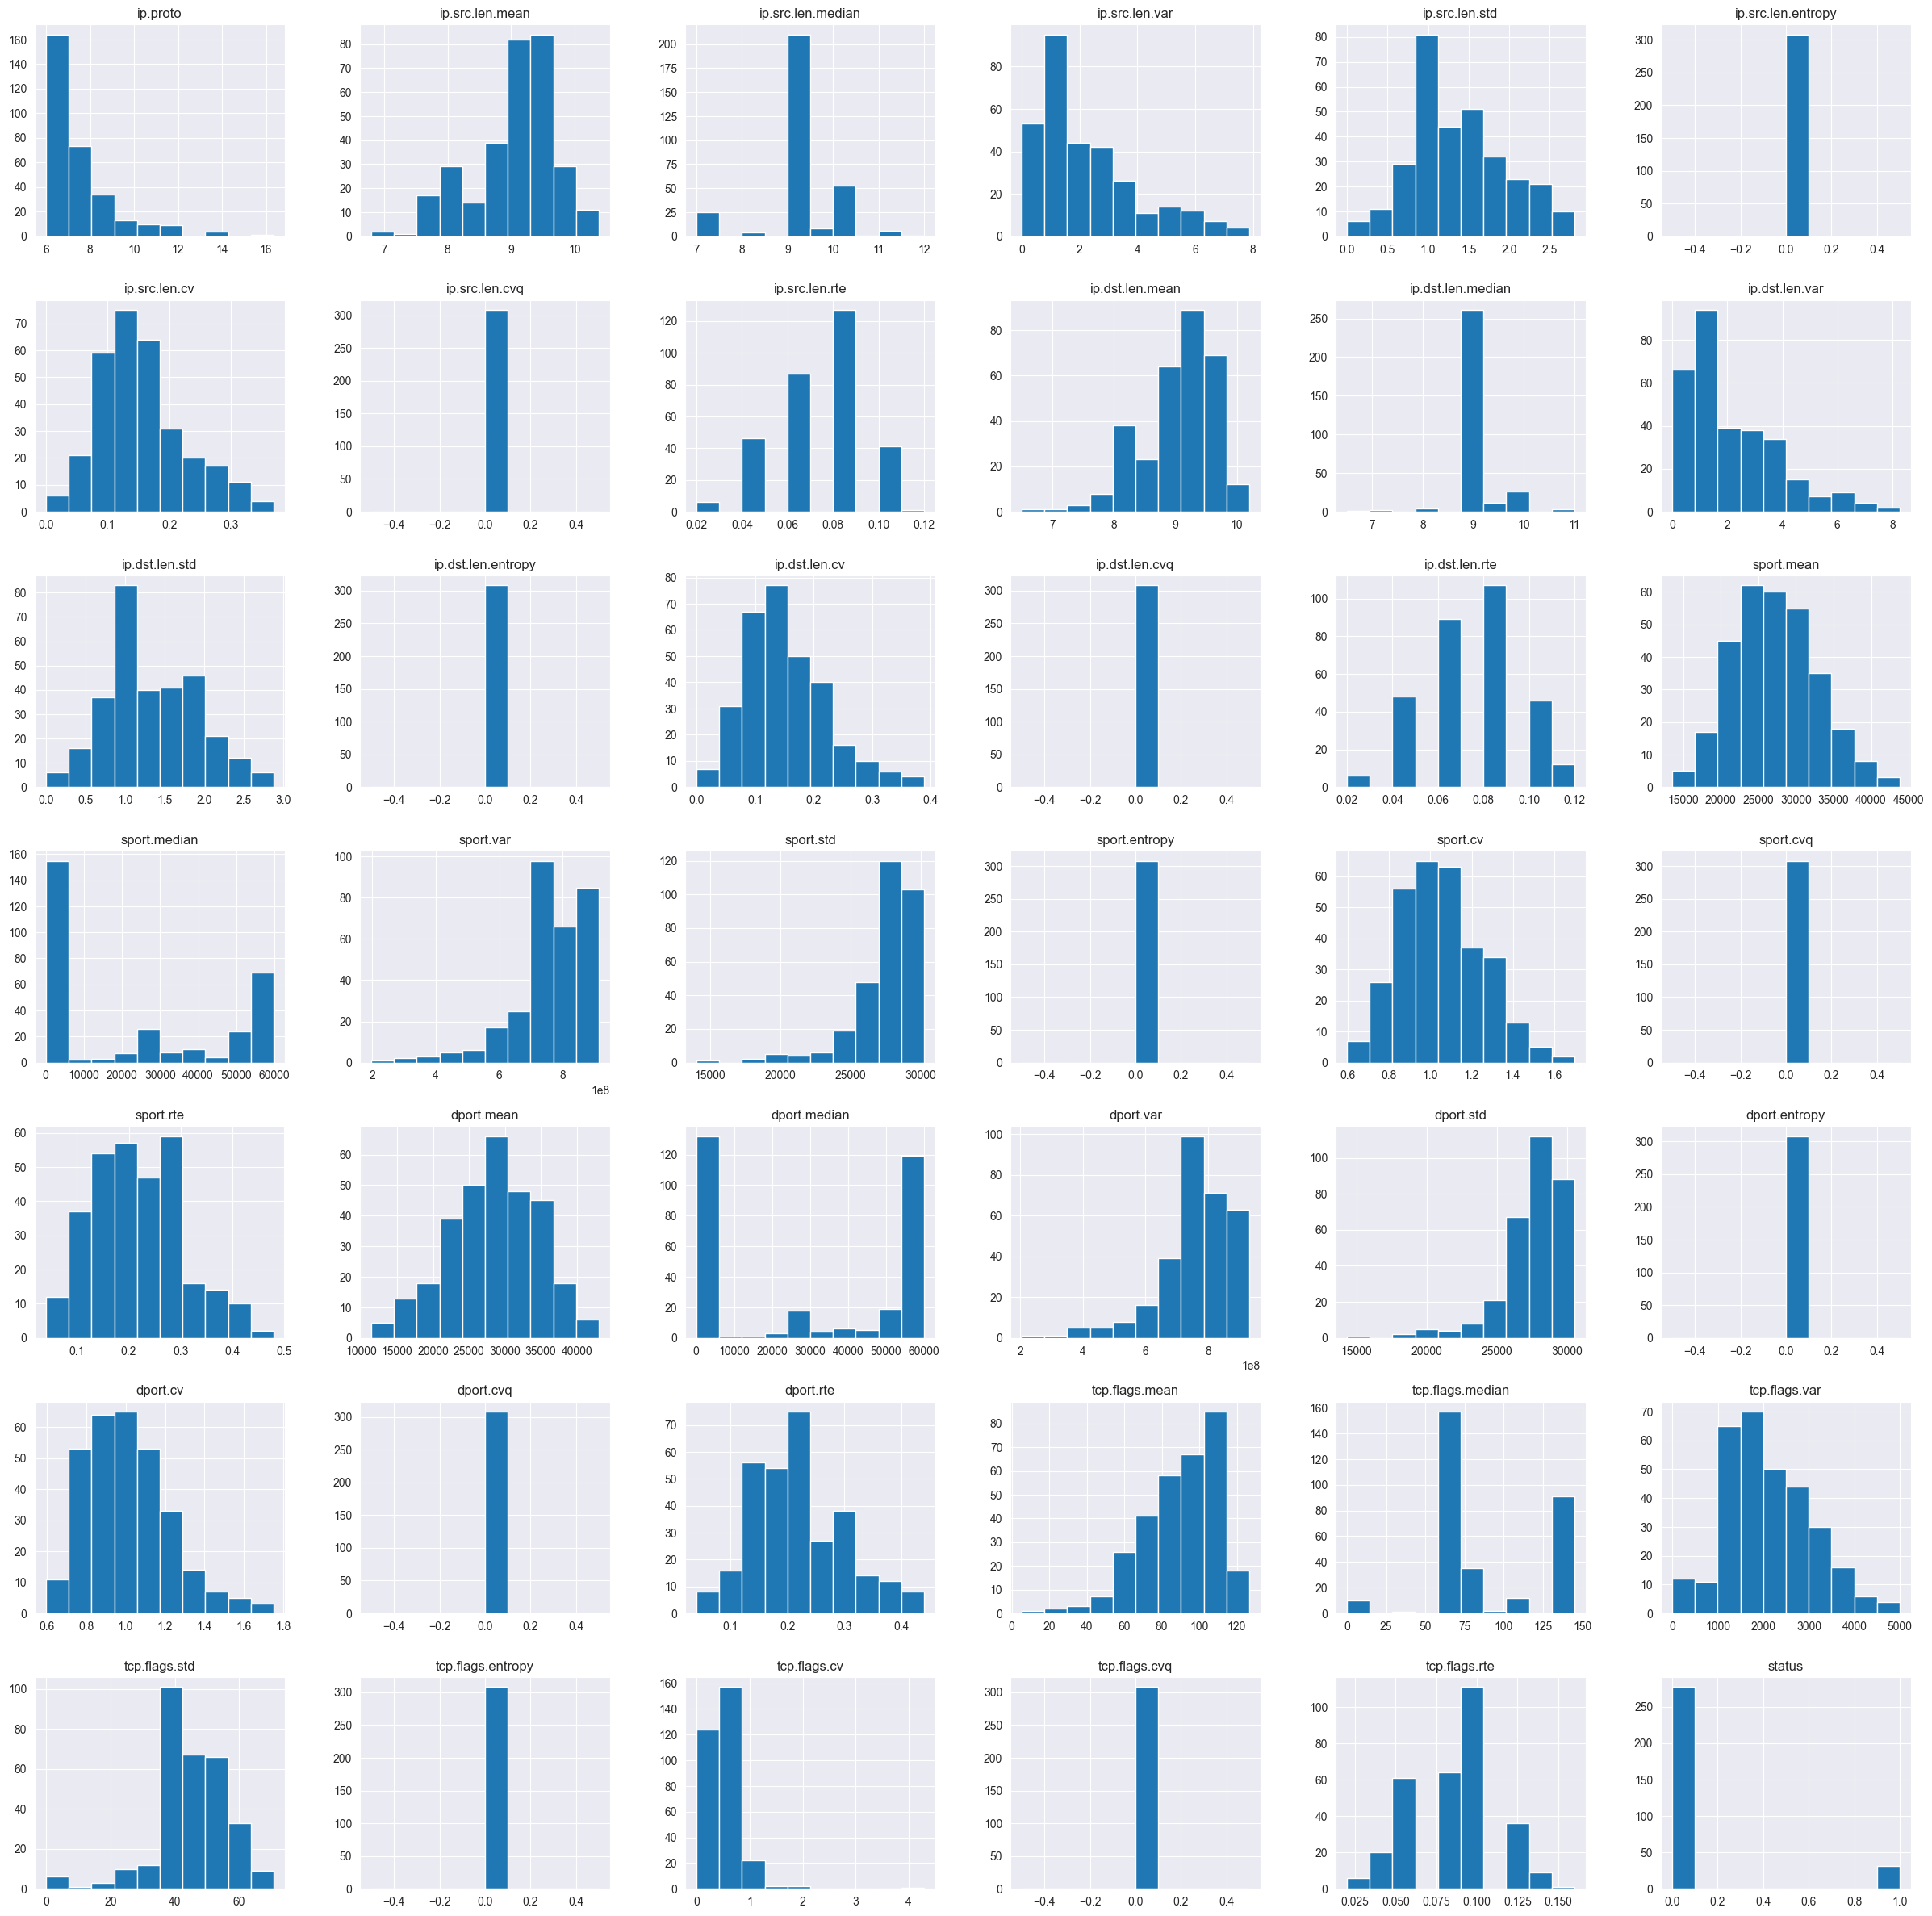

In [18]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


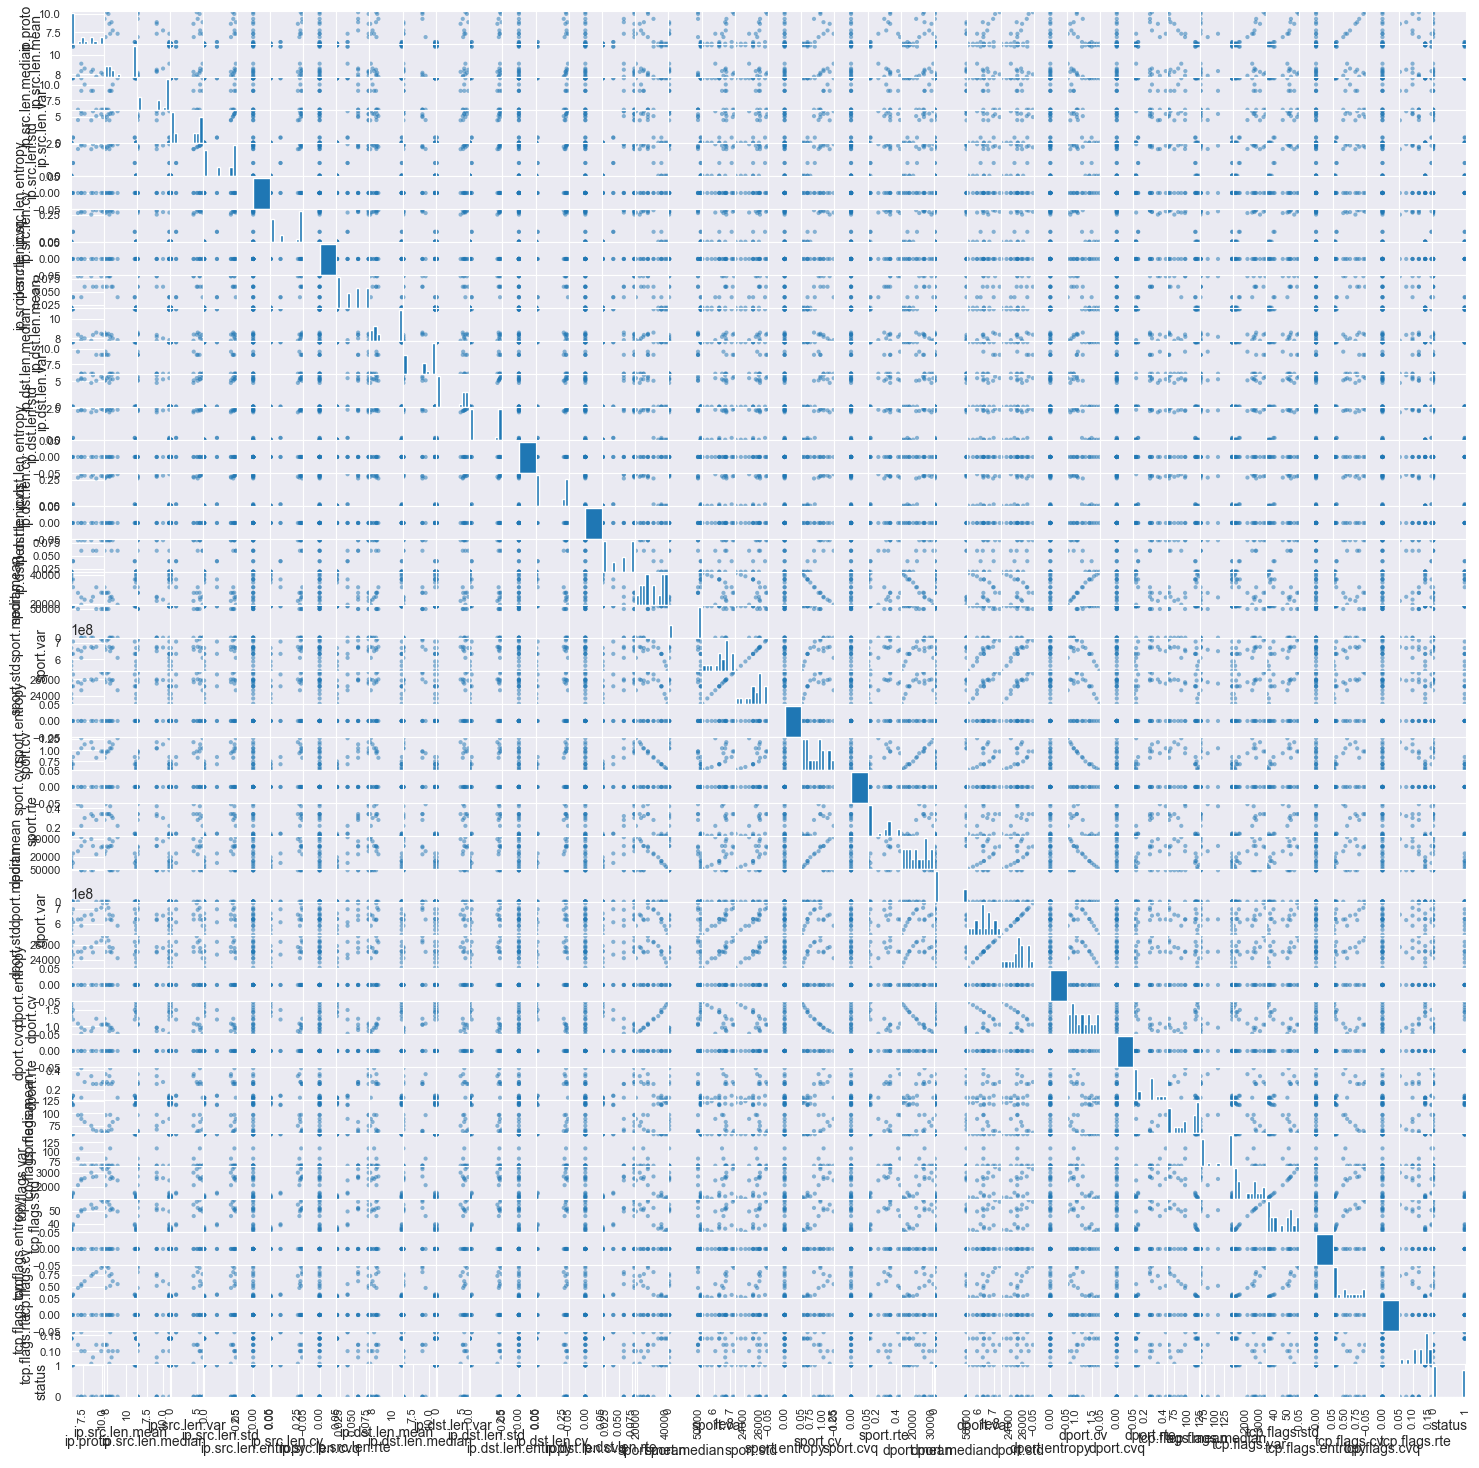

In [ ]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

<Axes: >

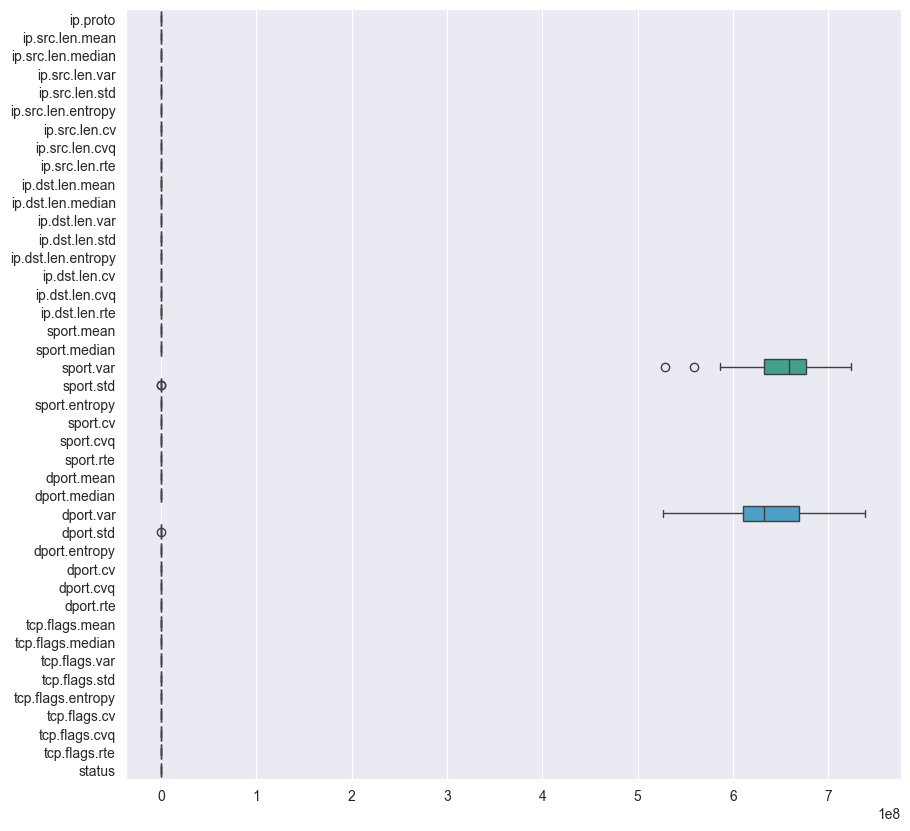

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature Selection

In [19]:
df.corr()

ip.proto  ip.src.len.mean  ip.src.len.median  \
ip.proto            1.000000        -0.471942           0.059711   
ip.src.len.mean    -0.471942         1.000000           0.712703   
ip.src.len.median   0.059711         0.712703           1.000000   
ip.src.len.var      0.853039        -0.351551           0.086667   
ip.src.len.std      0.808173        -0.315050           0.084891   
ip.src.len.entropy       NaN              NaN                NaN   
ip.src.len.cv       0.865055        -0.462274          -0.015723   
ip.src.len.cvq           NaN              NaN                NaN   
ip.src.len.rte      0.143140         0.302341           0.286994   
ip.dst.len.mean    -0.544284         0.866007           0.503386   
ip.dst.len.median  -0.162648         0.296490           0.026691   
ip.dst.len.var      0.901089        -0.364904           0.021829   
ip.dst.len.std      0.842949        -0.324751           0.009383   
ip.dst.len.entropy       NaN              NaN                NaN   
ip.dst.len.cv       0.894732        -0.438635          -0.047505   
ip.dst.len.cvq           NaN              NaN                NaN   
ip.dst.len.rte      0.199021         0.244104           0.218147   
sport.mean          0.077823        -0.102547          -0.251722   
sport.median        0.033665        -0.179971          -0.338927   
sport.var           0.106860         0.250323           0.253678   
sport.std           0.099889         0.261090           0.268215   
sport.entropy            NaN              NaN                NaN   
sport.cv           -0.075314         0.283490           0.452699   
sport.cvq                NaN              NaN                NaN   
sport.rte           0.304679        -0.081500          -0.075092   
dport.mean         -0.026533         0.453192           0.613478   
dport.median       -0.028125         0.372199           0.542834   
dport.var           0.090717         0.253385           0.253486   
dport.std           0.084371         0.263649           0.266757   
dport.entropy            NaN              NaN                NaN   
dport.cv            0.027757        -0.379159          -0.542812   
dport.cvq                NaN              NaN                NaN   
dport.rte           0.297780        -0.004360           0.052567   
tcp.flags.mean     -0.748556         0.313875          -0.144051   
tcp.flags.median   -0.524990         0.208577          -0.133095   
tcp.flags.var       0.651836        -0.215233           0.054213   
tcp.flags.std       0.567157        -0.183789           0.020770   
tcp.flags.entropy        NaN              NaN                NaN   
tcp.flags.cv        0.891321        -0.450300           0.027499   
tcp.flags.cvq            NaN              NaN                NaN   
tcp.flags.rte       0.171713        -0.223845          -0.256288   
status             -0.270230        -0.603975          -0.762881   

                    ip.src.len.var  ip.src.len.std  ip.src.len.entropy  \
ip.proto                  0.853039        0.808173                 NaN   
ip.src.len.mean          -0.351551       -0.315050                 NaN   
ip.src.len.median         0.086667        0.084891                 NaN   
ip.src.len.var            1.000000        0.969971                 NaN   
ip.src.len.std            0.969971        1.000000                 NaN   
ip.src.len.entropy             NaN             NaN                 NaN   
ip.src.len.cv             0.970043        0.983509                 NaN   
ip.src.len.cvq                 NaN             NaN                 NaN   
ip.src.len.rte            0.280460        0.384502                 NaN   
ip.dst.len.mean          -0.356589       -0.322134                 NaN   
ip.dst.len.median        -0.152873       -0.138536                 NaN   
ip.dst.len.var            0.823096        0.805342                 NaN   
ip.dst.len.std            0.803157        0.832976                 NaN   
ip.dst.len.entropy             NaN             NaN         

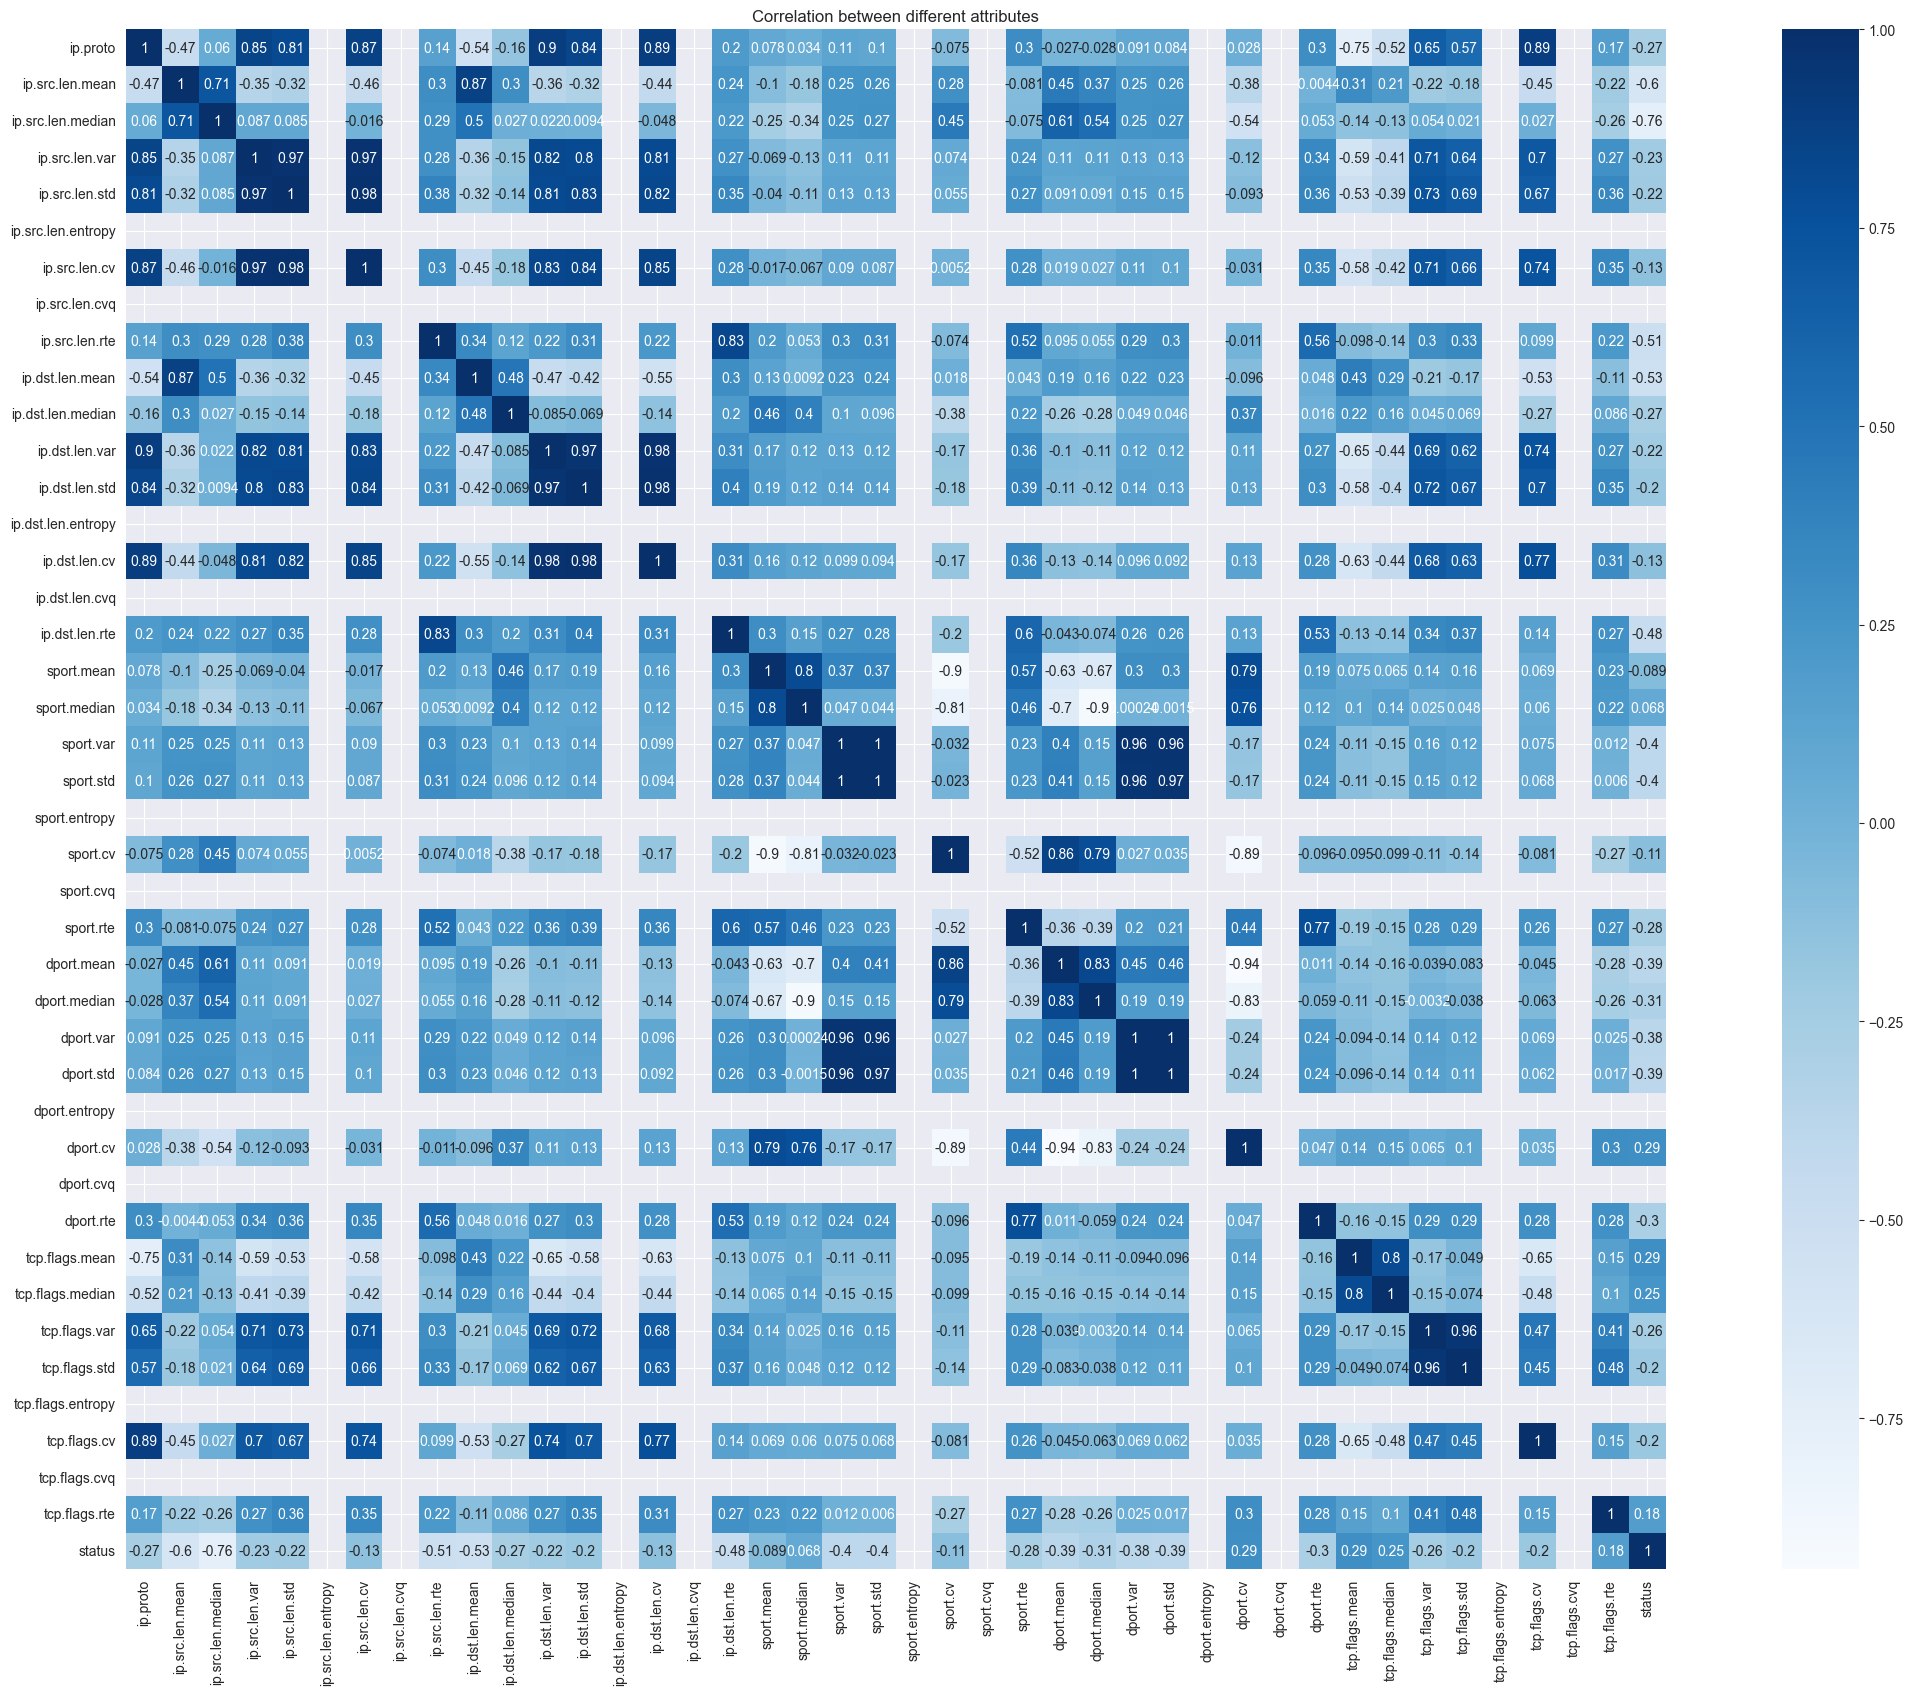

In [21]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

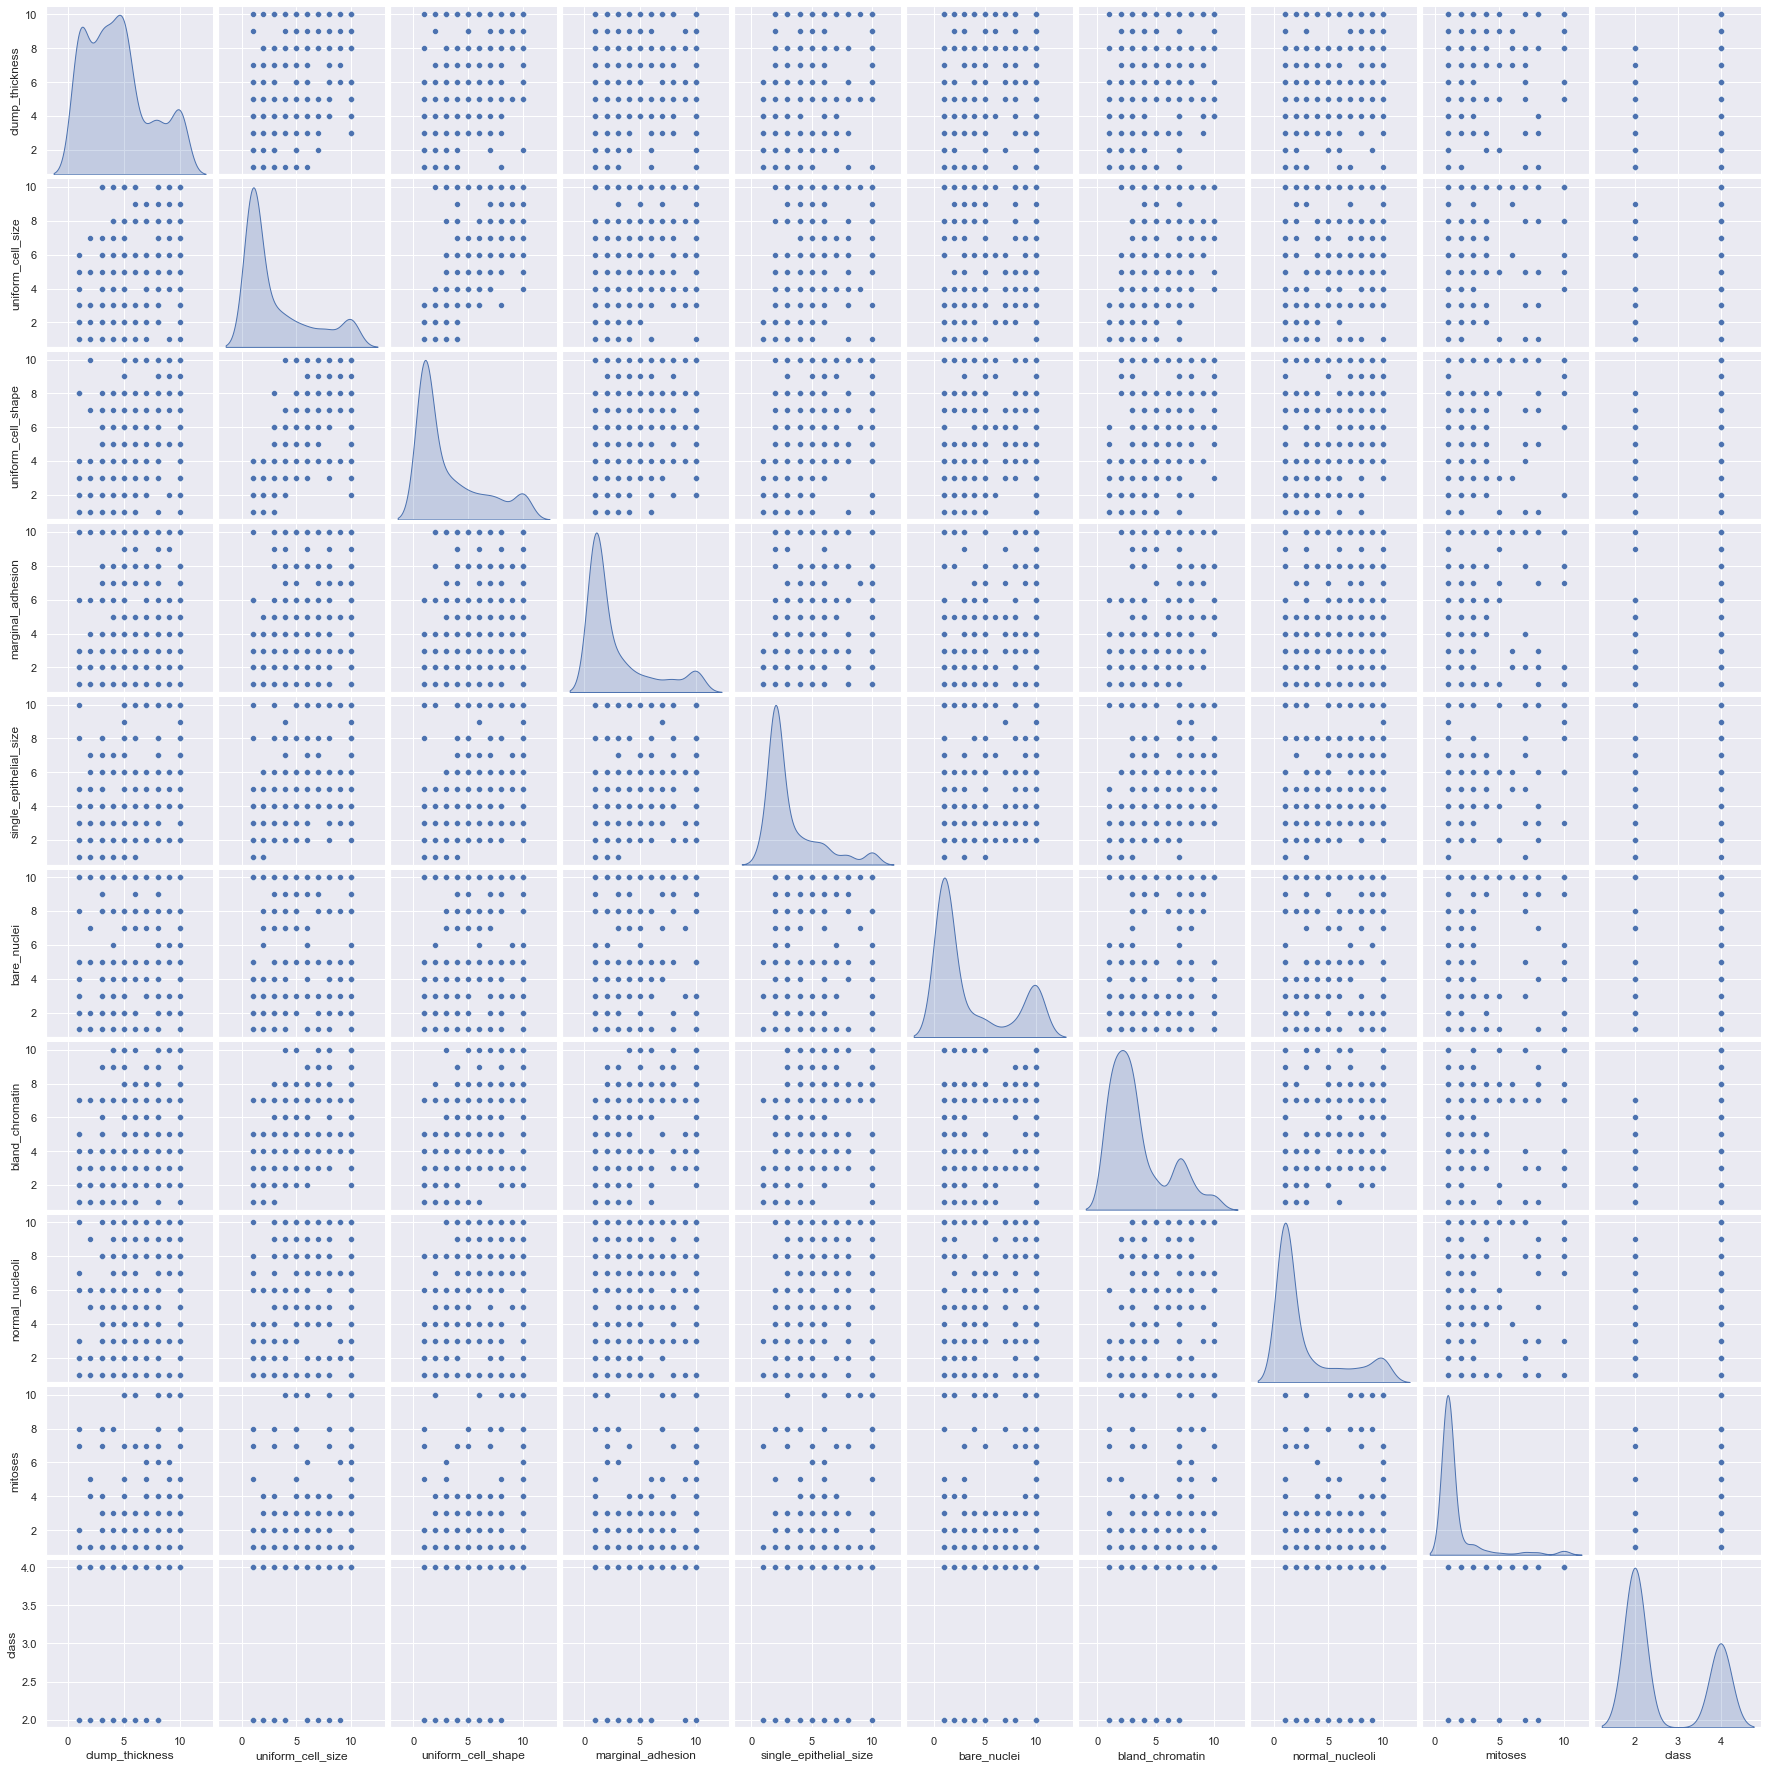

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [22]:
# Correlation with output variable
cor_target = abs(cor["status"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

ip.proto             0.270230
ip.src.len.mean      0.603975
ip.src.len.median    0.762881
ip.src.len.var       0.234960
ip.src.len.std       0.216907
ip.src.len.cv        0.131000
ip.src.len.rte       0.514486
ip.dst.len.mean      0.525948
ip.dst.len.median    0.269721
ip.dst.len.var       0.222415
ip.dst.len.std       0.196301
ip.dst.len.cv        0.126304
ip.dst.len.rte       0.477632
sport.mean           0.089323
sport.median         0.067897
sport.var            0.397050
sport.std            0.401277
sport.cv             0.108304
sport.rte            0.279193
dport.mean           0.386376
dport.median         0.309420
dport.var            0.384368
dport.std            0.387846
dport.cv             0.293868
dport.rte            0.295741
tcp.flags.mean       0.292190
tcp.flags.median     0.248332
tcp.flags.var        0.255765
tcp.flags.std        0.202889
tcp.flags.cv         0.196269
tcp.flags.rte        0.178446
status               1.000000
Name: status, dtype: float64

## Train and Test Model

In [23]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = df['status'].values
X = df.drop('status', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [24]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

## Model Selection
### Single Decision Tree

Here we quickly build and train a single decision tree on the data using Scikit-Learn. The tree will learn how to separate the points, building a flowchart of questions based on the feature values and the labels. At each stage, the decision tree makes splits by maximizing the reduction in Gini impurity.

In [25]:
# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=50)
tree.fit(X_train, Y_train)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 7 nodes with maximum depth 3.


In [26]:
print(f'Model Accuracy: {tree.score(X_test, Y_test)}')

Model Accuracy: 1.0


#### Confusion Matrix

In [27]:
# Make probability predictions
train_probs = tree.predict_proba(X_train)[:, 1]
probs = tree.predict_proba(X_test)[:, 1]

train_predictions = tree.predict(X_train)
predictions = tree.predict(X_test)

Confusion matrix, without normalization
[[81  0]
 [ 0 12]]


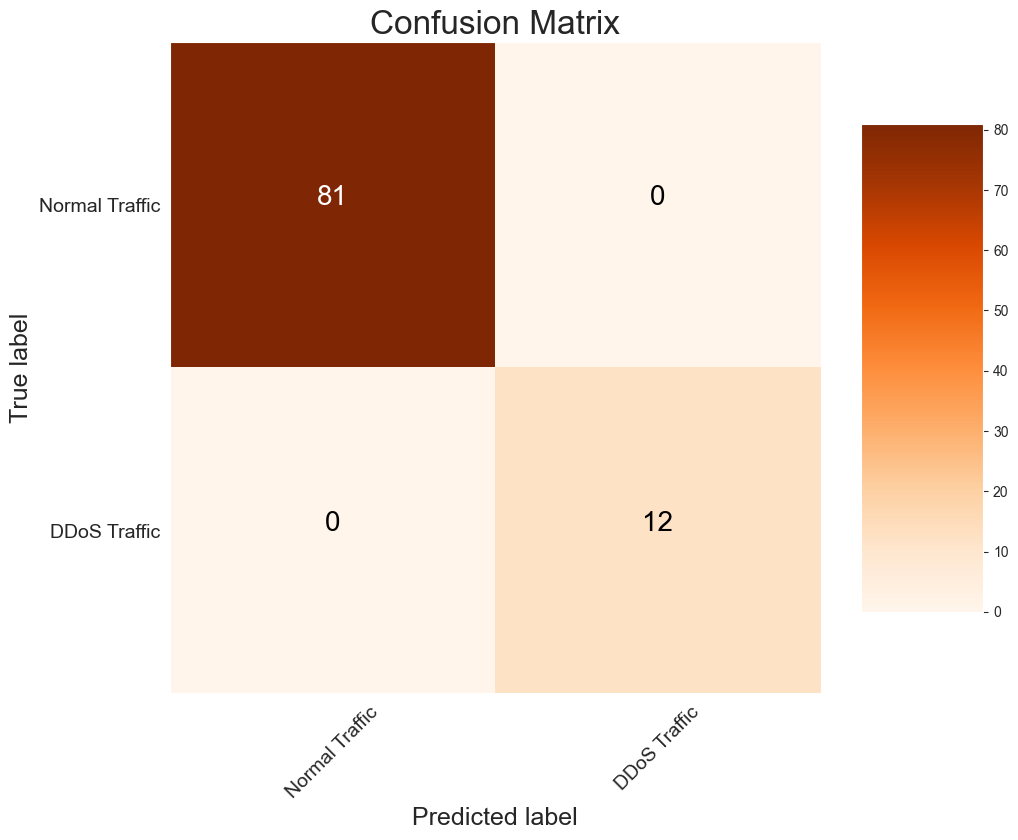

In [28]:
cm = confusion_matrix(Y_test, predictions)
plot_confusion_matrix(cm, classes = ['Normal Traffic', 'DDoS Traffic'], title = 'Confusion Matrix')

#### Feature Importance

In [29]:
importances = pd.DataFrame({
  	'feature': list(df.drop('status', axis=1).columns),
  	'importance': tree.feature_importances_
}).sort_values('importance', ascending = False)
importances.head()

feature  importance
2   ip.src.len.median    0.942559
40      tcp.flags.rte    0.028867
10  ip.dst.len.median    0.028574
39      tcp.flags.cvq    0.000000
38       tcp.flags.cv    0.000000

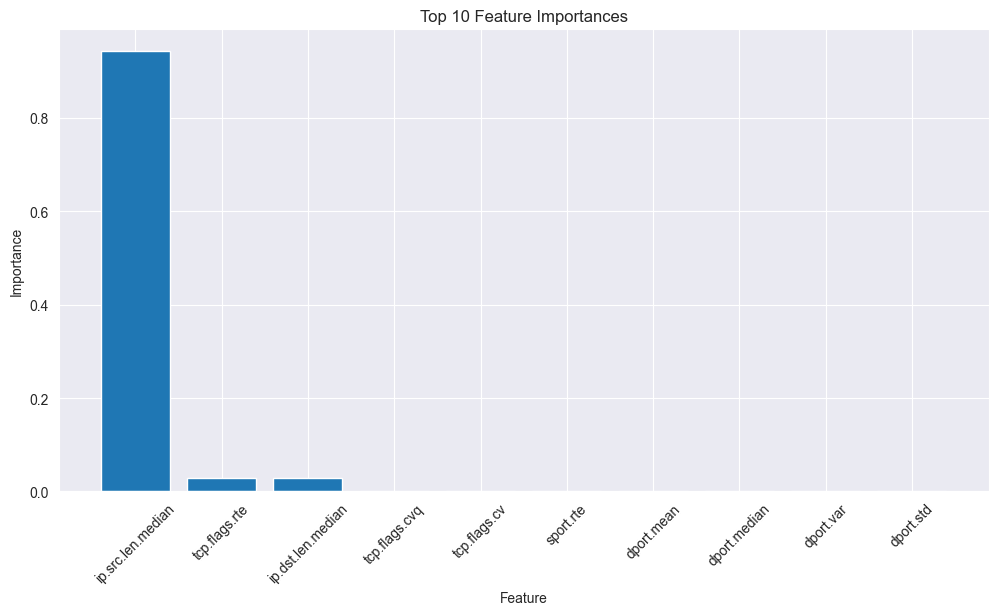

In [30]:
plt.figure(figsize=(12, 6))
plt.bar(importances['feature'][:10], importances['importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45)
plt.show()

#### Visualize Decision Tree

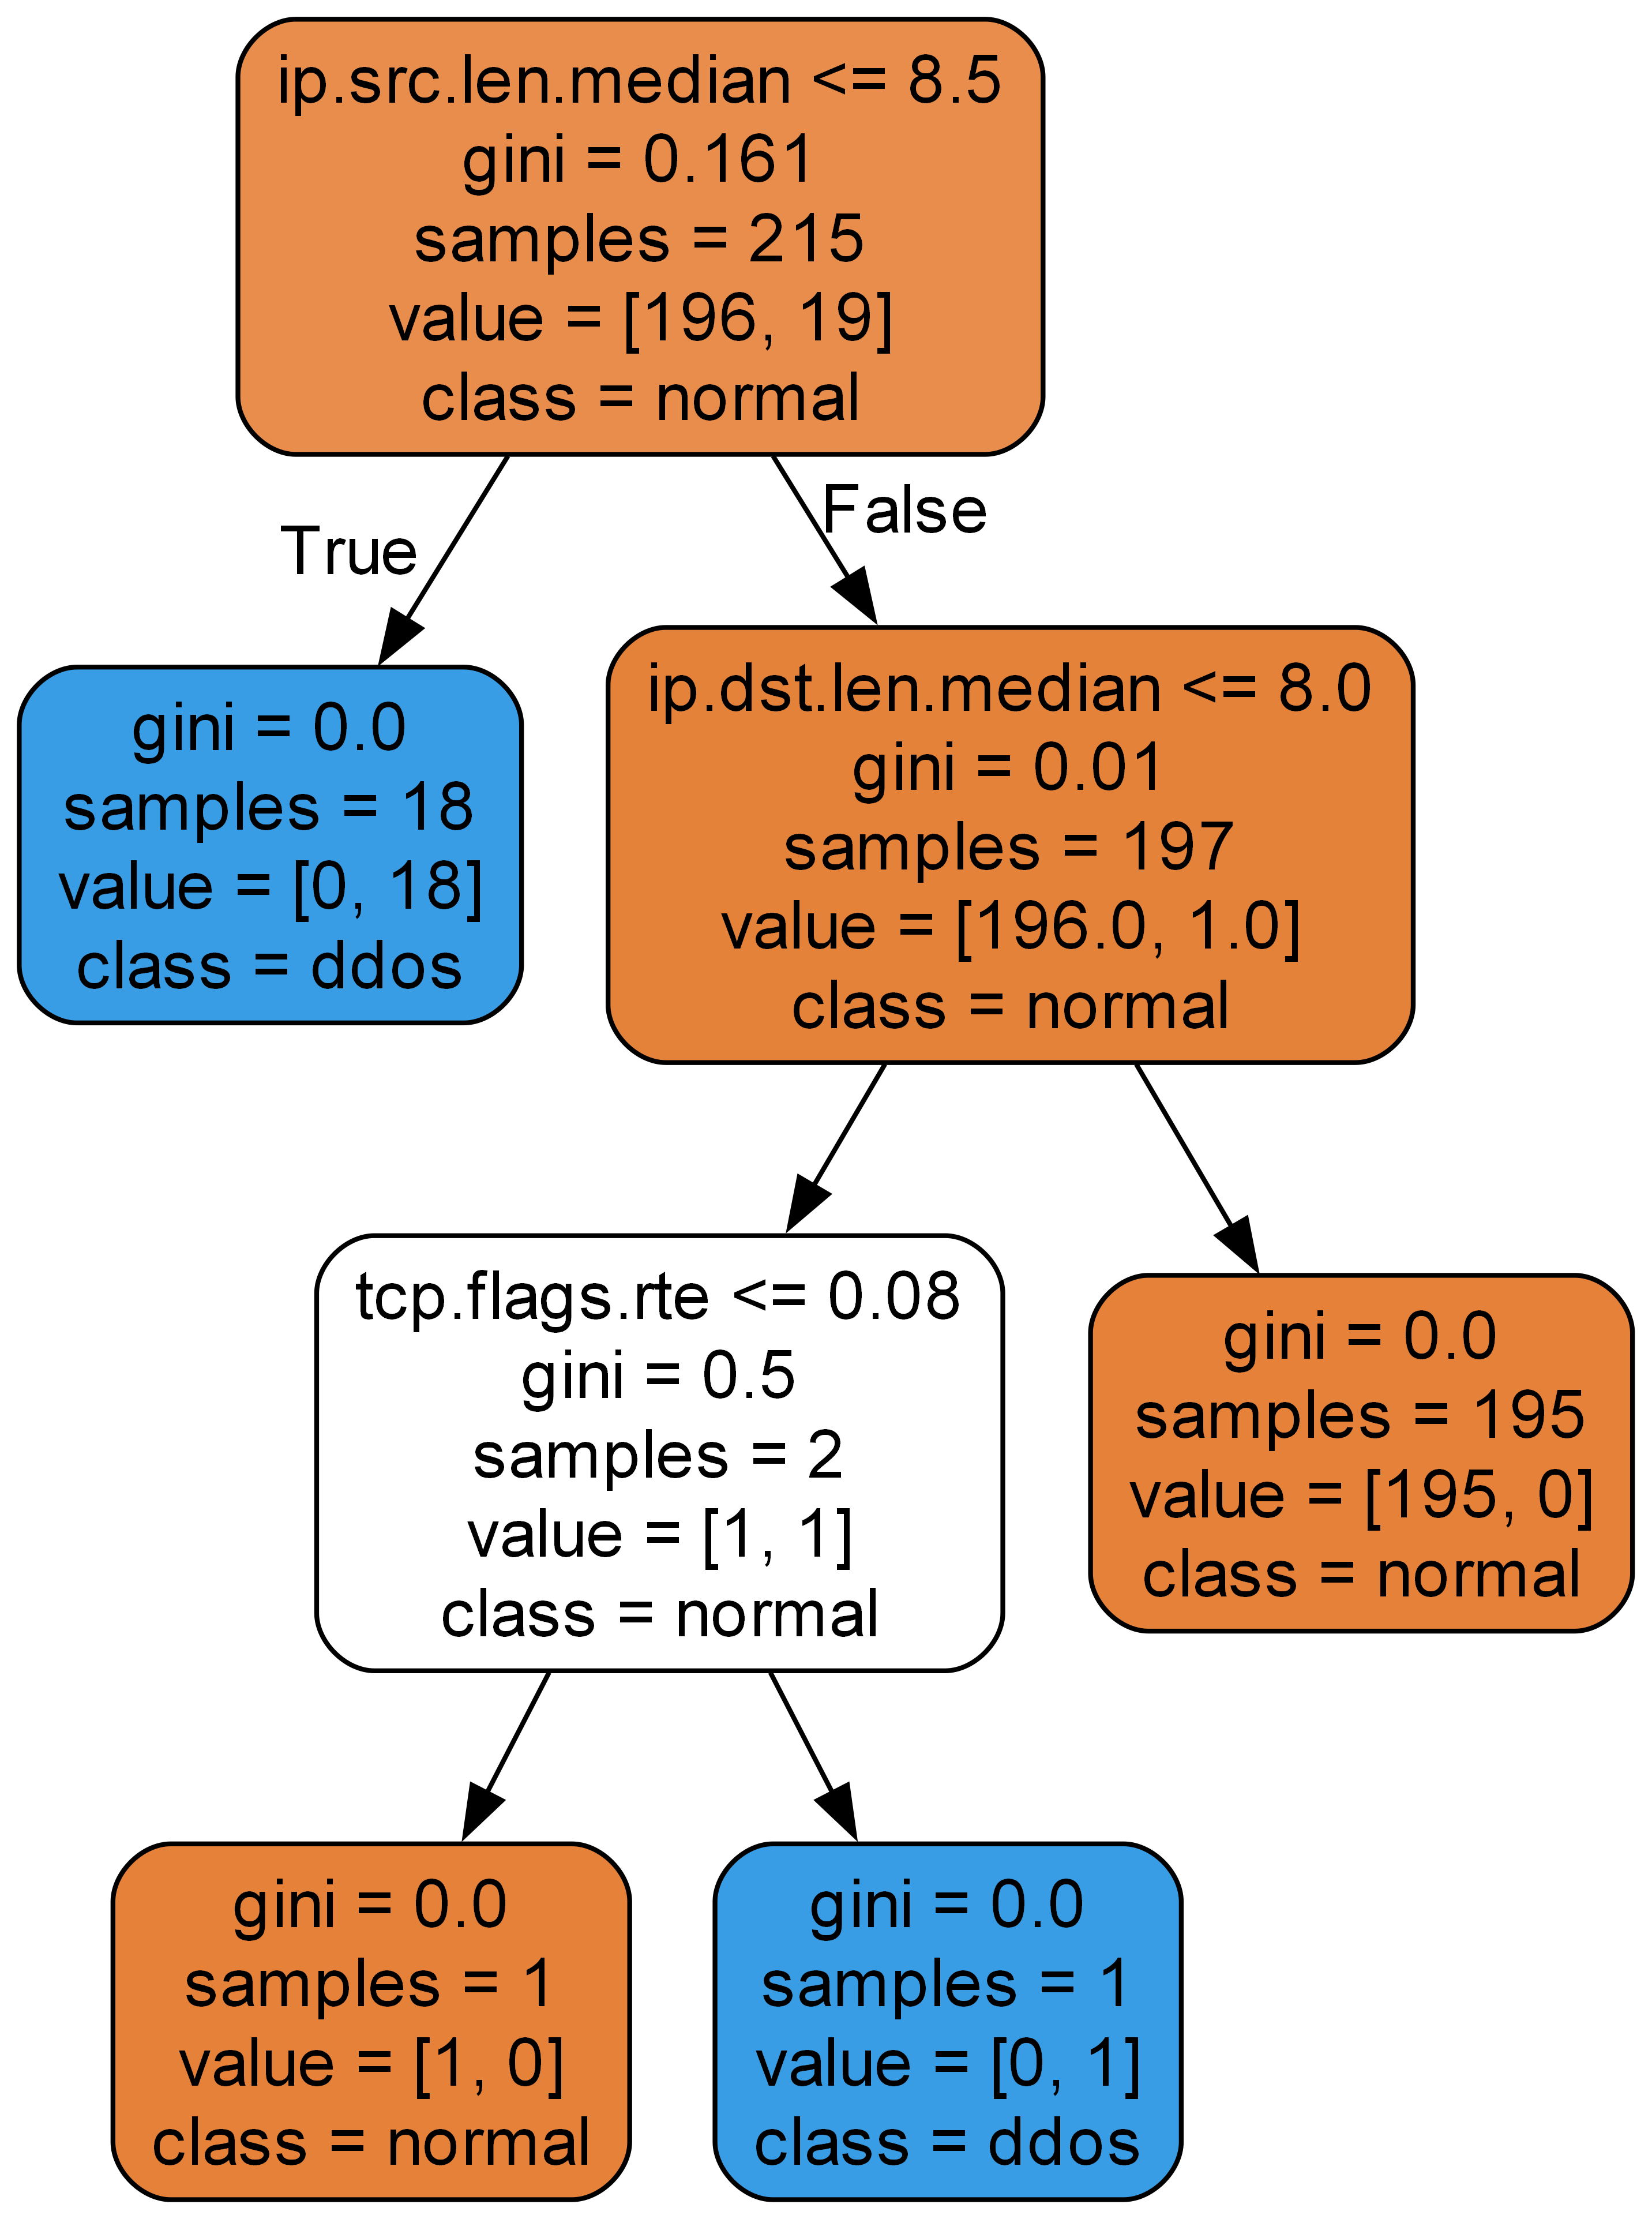

In [31]:
export_graphviz(tree, 'tree.dot', rounded = True, feature_names=list(df.columns[:-1]), class_names = ['normal', 'ddos'], filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image('tree.png')

## Random Forest Classifier

Now we can move on to a more powerful model, the random forest. This takes the idea of a single decision tree, and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Each tree is trained on a random set of the observations, and for each split of a node, only a subset of the features are used for making a split. When making predictions, the random forest averages the predictions for each of the individual decision trees for each data point in order to arrive at a final classification.

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=50, max_features = 'sqrt', n_jobs=-1, verbose = 1)
model.fit(X_train, Y_train)

n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
  n_nodes.append(ind_tree.tree_.node_count)
  max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


Average number of nodes 7
Average maximum depth 2


#### Confusion Matrix

In [33]:
# Make probability predictions
train_probs = model.predict_proba(X_train)[:, 1]
probs = model.predict_proba(X_test)[:, 1]

train_predictions = model.predict(X_train)
predictions = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Confusion matrix, without normalization
[[81  0]
 [ 0 12]]


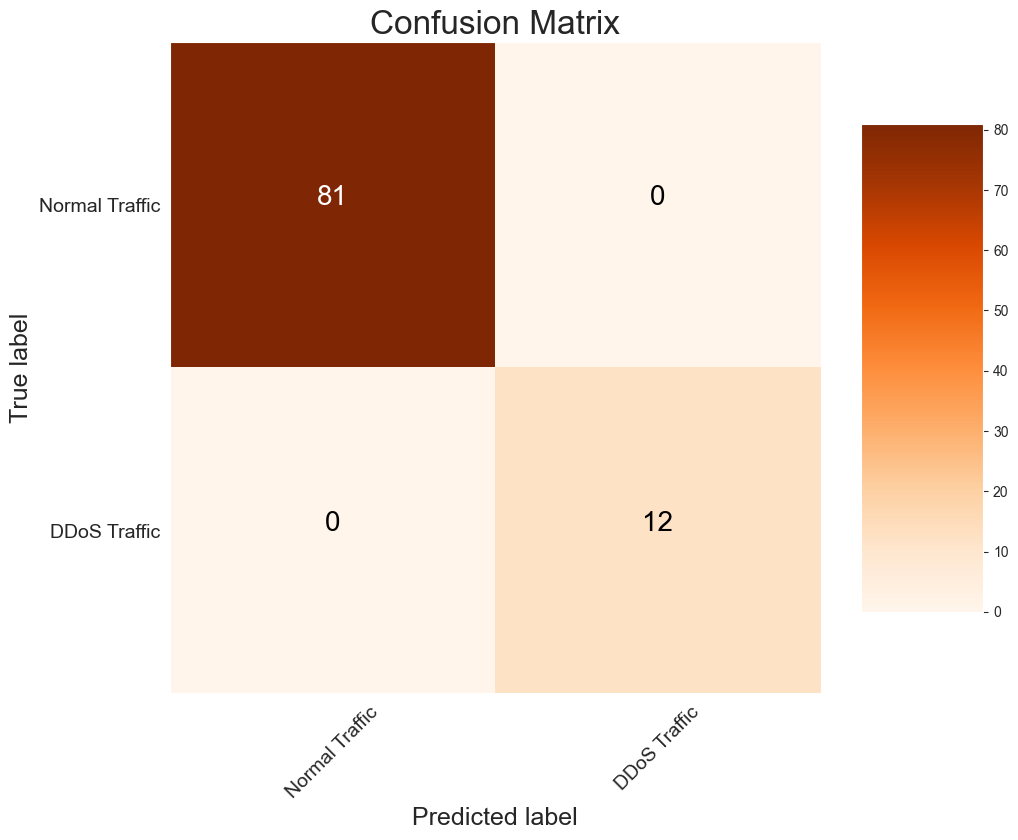

In [34]:
cm = confusion_matrix(Y_test, predictions)
plot_confusion_matrix(cm, classes = ['Normal Traffic', 'DDoS Traffic'], title = 'Confusion Matrix')

#### Feature Importance

In [35]:
importances = pd.DataFrame({
  	'feature': list(df.drop('status', axis=1).columns),
  	'importance': model.feature_importances_
}).sort_values('importance', ascending = False)
importances.head()

feature  importance
2   ip.src.len.median    0.157815
1     ip.src.len.mean    0.144868
26       dport.median    0.111698
9     ip.dst.len.mean    0.108180
8      ip.src.len.rte    0.070713

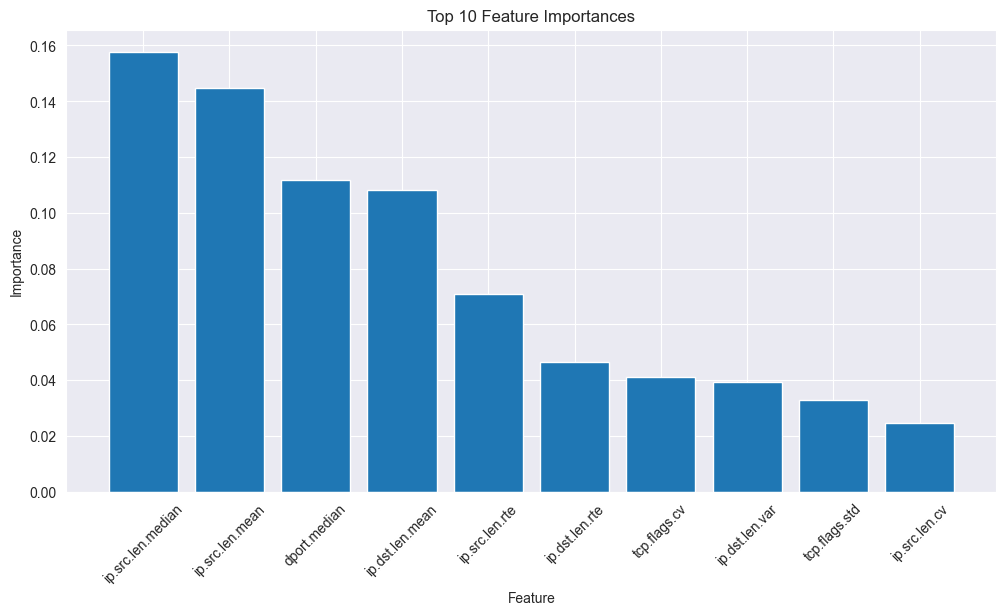

In [36]:
plt.figure(figsize=(12, 6))
plt.bar(importances['feature'][:10], importances['importance'][:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45)
plt.show()

#### Visualize The Forest

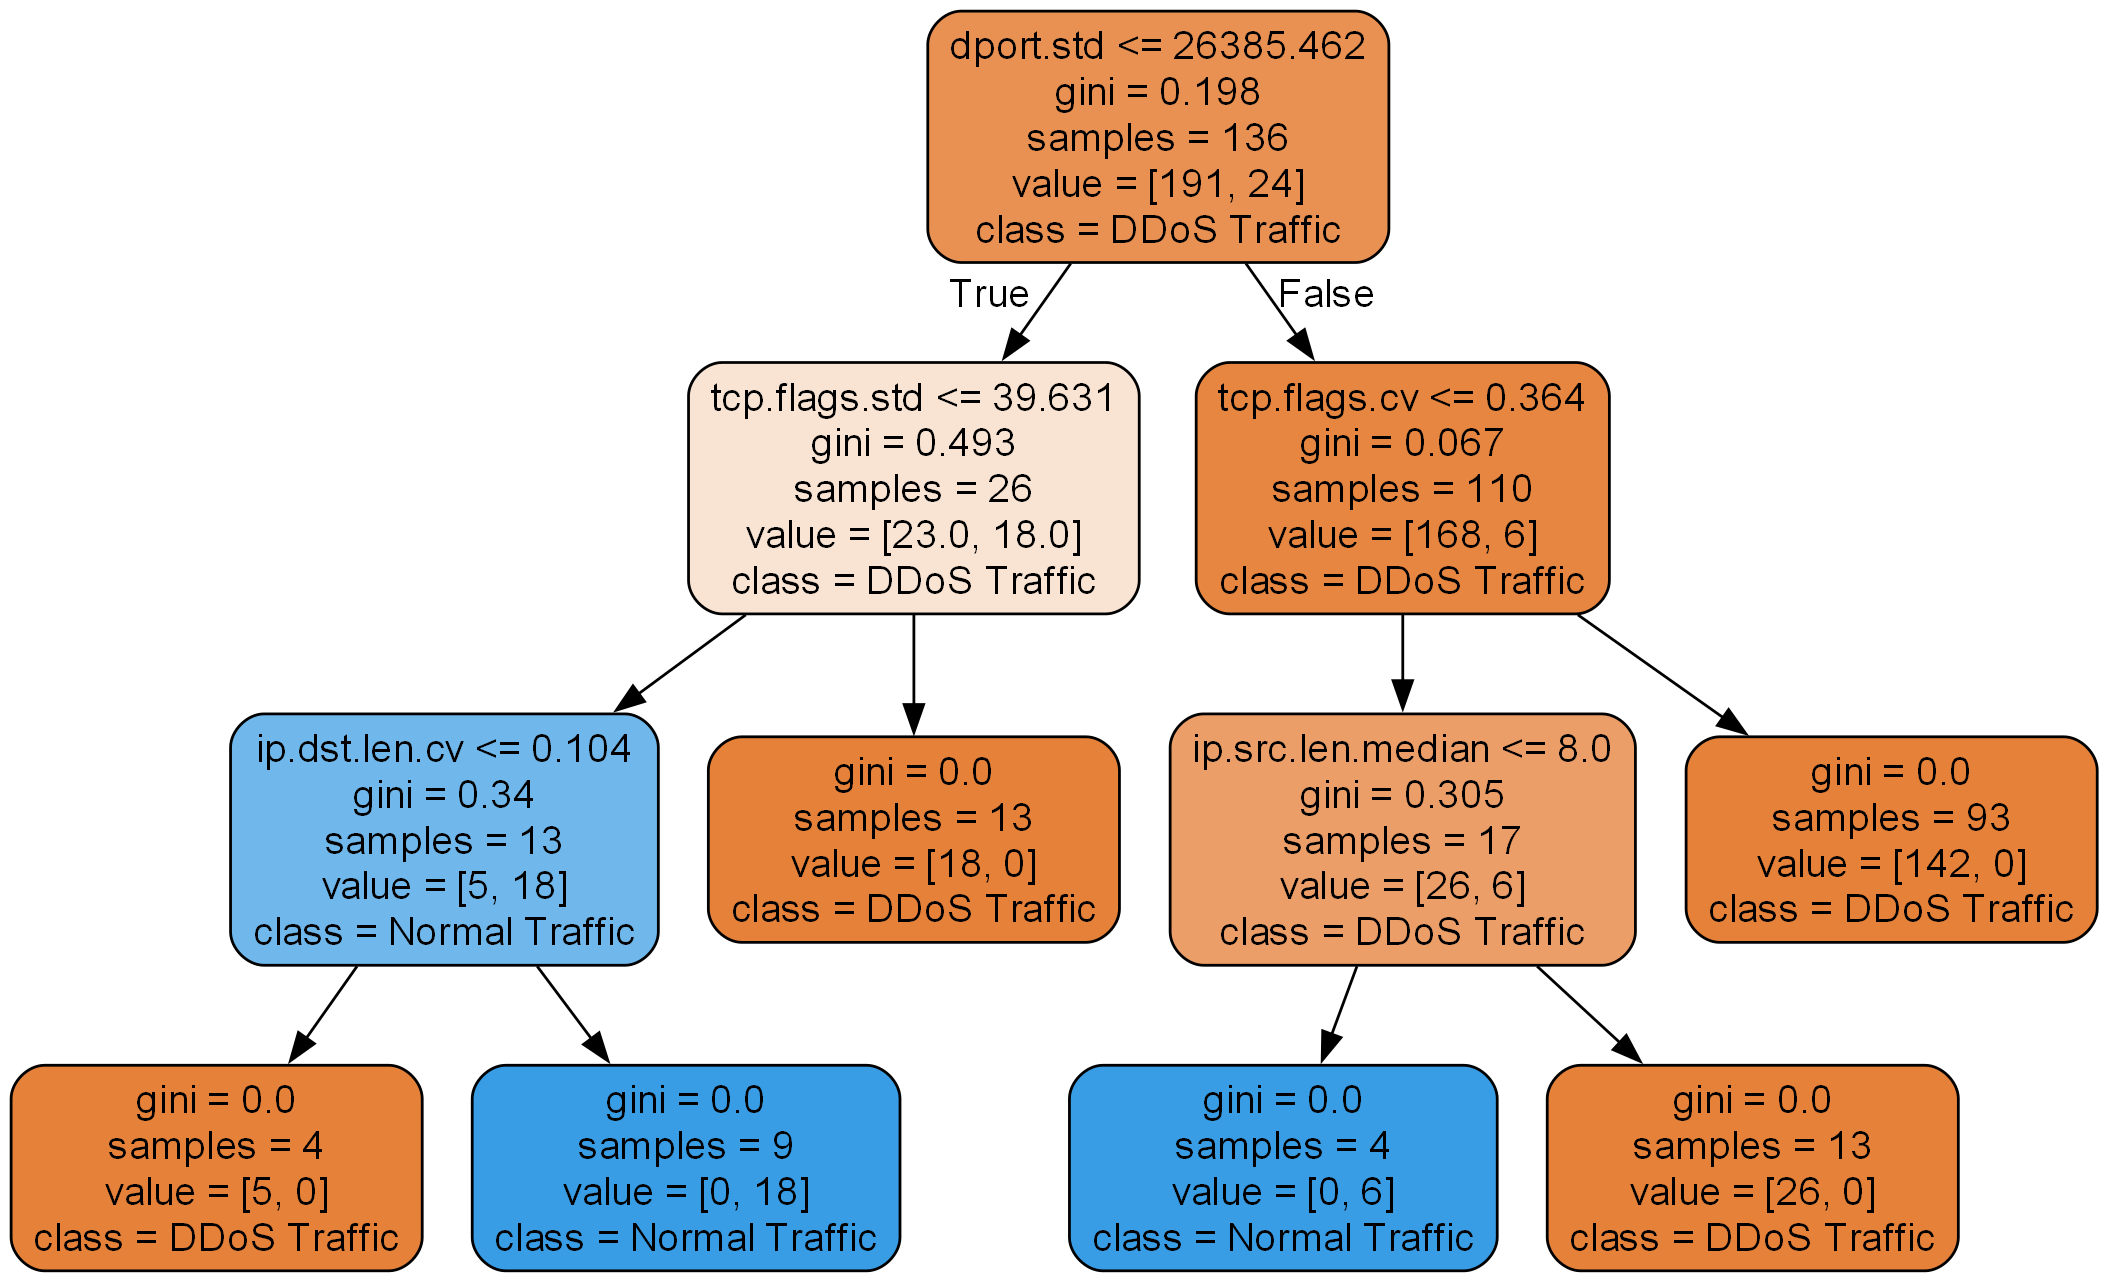

In [37]:
estimator = model.estimators_[1]
export_graphviz(estimator, 'forest.dot', rounded = True, feature_names=list(df.columns[:-1]), max_depth = 8, class_names = ['DDoS Traffic', 'Normal Traffic'], filled = True)

call(['dot', '-Tpng', 'forest.dot', '-o', 'forest.png', '-Gdpi=200'])
Image('forest.png')

In [38]:
print(f'Model Accuracy: {estimator.score(X_test, Y_test)}')

Model Accuracy: 0.956989247311828


In [39]:
# Dump the trained model to a file
from joblib import dump
dump(model, 'model.sav')

['model.sav']